# Intra-scan motion

In [1]:
import torch
from cornucopia.utils.py import meshgrid_ij
from cornucopia import (
    IntraScanMotionTransform,
    ArrayCoilTransform,
    SmallIntraScanMotionTransform,
    RandomThroughSliceAffineTransform,
)
import  matplotlib.pyplot as plt

Generate a digital phantom

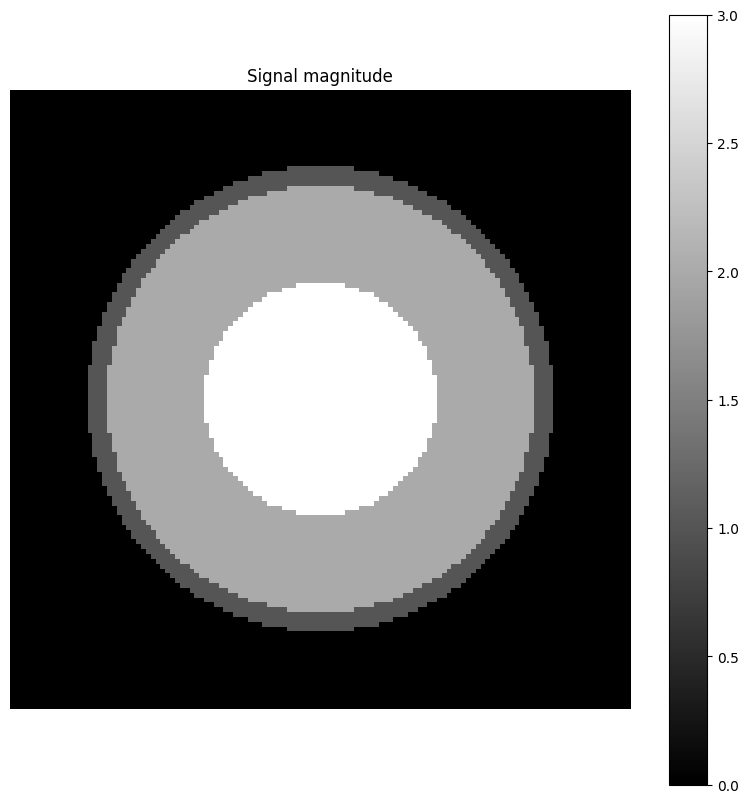

In [2]:
shape = [128, 128]
radius = torch.stack(meshgrid_ij(*[torch.arange(s).float() for s in shape]), -1)
radius -= (torch.as_tensor(shape).float() - 1) / 2
radius = radius.square().sum(-1).sqrt()

mag = torch.zeros_like(radius, dtype=torch.float32)
mag[radius < 48] = 1
mag[radius < 44] = 2
mag[radius < 24] = 3

plt.figure(figsize=(10, 10))
plt.imshow(mag, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal magnitude')
plt.colorbar()
plt.show()

Build k-space from 4 shots acquired with different object position

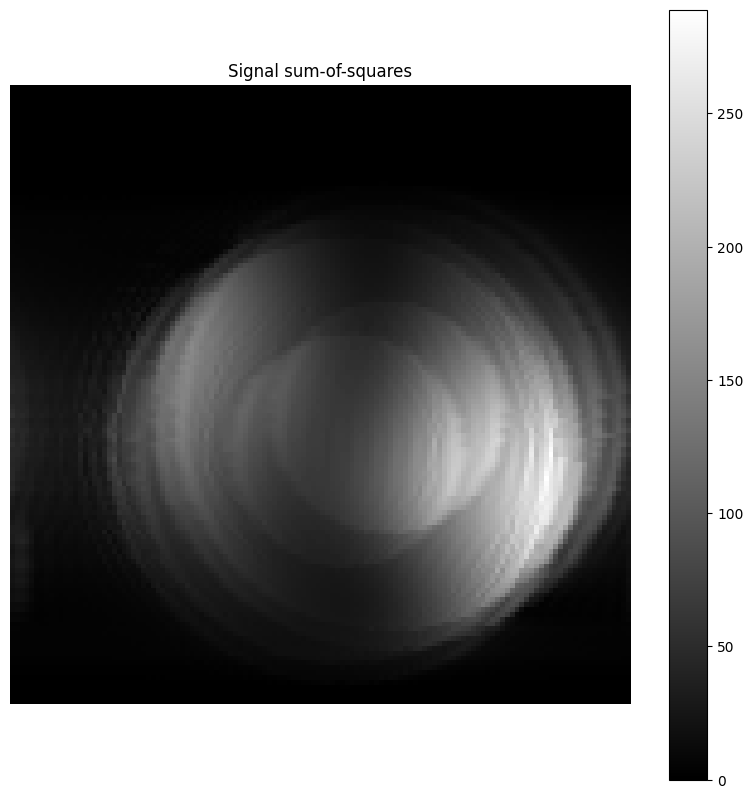

In [3]:
trf = IntraScanMotionTransform(coils=ArrayCoilTransform())
sos = trf(mag[None])[0]

plt.figure(figsize=(10, 10))
plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()

We can switch to a random sampling pattern

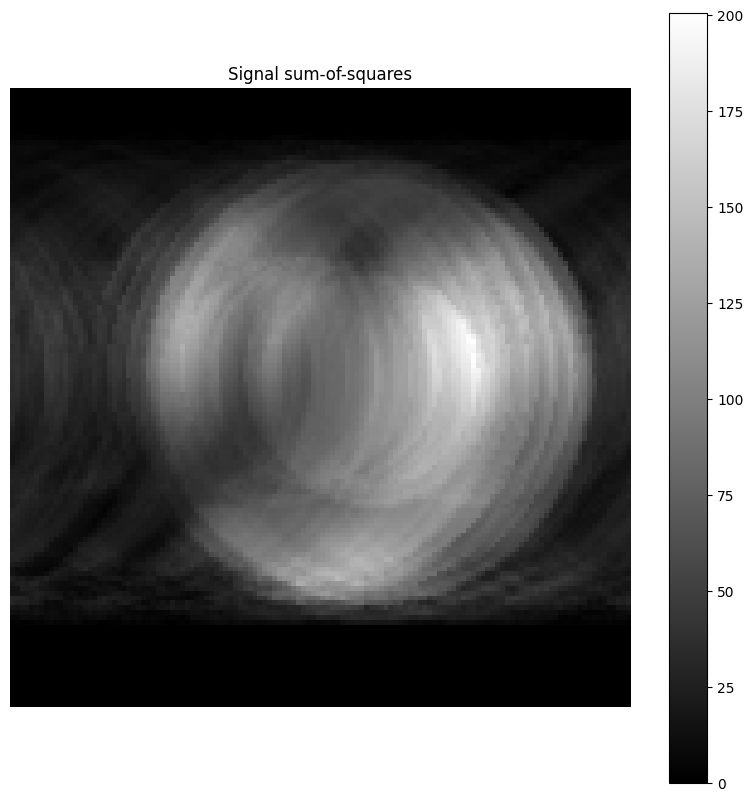

In [4]:
trf = IntraScanMotionTransform(coils=ArrayCoilTransform(), pattern='random')
sos = trf(mag[None])[0]

plt.figure(figsize=(10, 10))
plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()

Same experiment, but this time motion happens across a "slice" axis (no FFT involved)

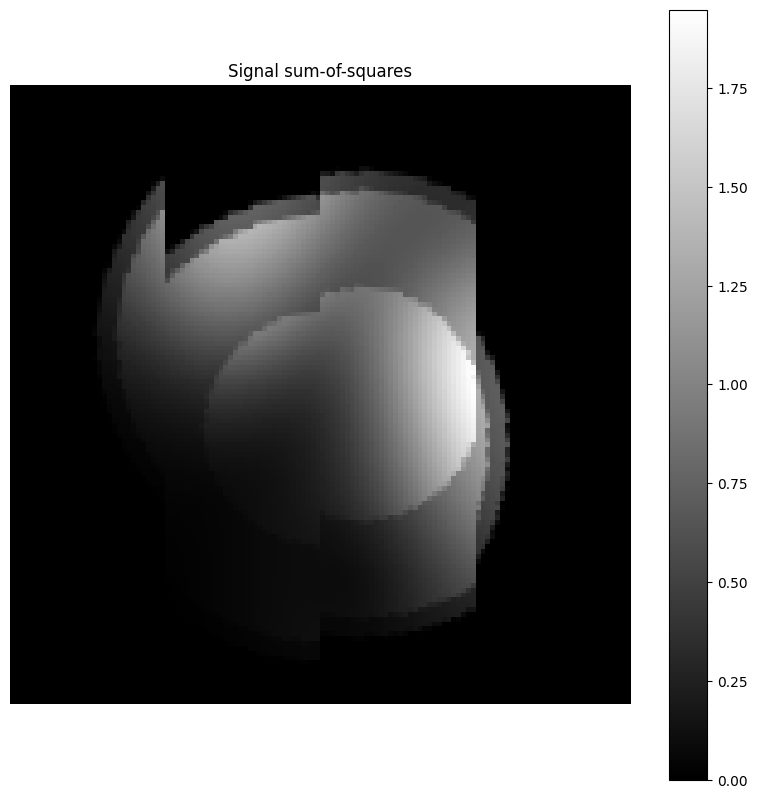

In [5]:
plt.show()
trf = IntraScanMotionTransform(coils=ArrayCoilTransform(), freq=False)
sos = trf(mag[None])[0]

plt.figure(figsize=(10, 10))
plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()

Finally, sample some small motion

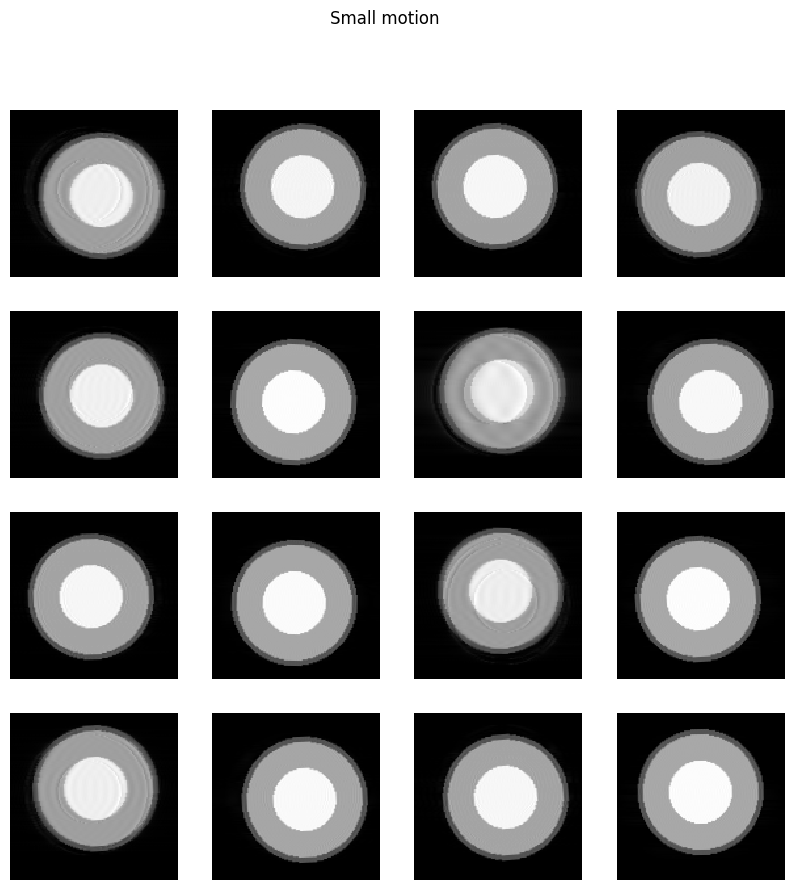

In [6]:
trf = SmallIntraScanMotionTransform()

shape = [4, 4]
plt.rcParams["figure.figsize"] = (15, 15)

plt.figure(figsize=(10, 10))
for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(mag[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.suptitle('Small motion')
plt.show()

We also have a transform that applies different amounts of (through plane)
motion to different slices. It can be useful to model motion occuring
during the acquisition of a stack of slices.

It is quite similar to `IntraScanMotionTransform(freq=False)`, but implemented
in a much more efficient way.

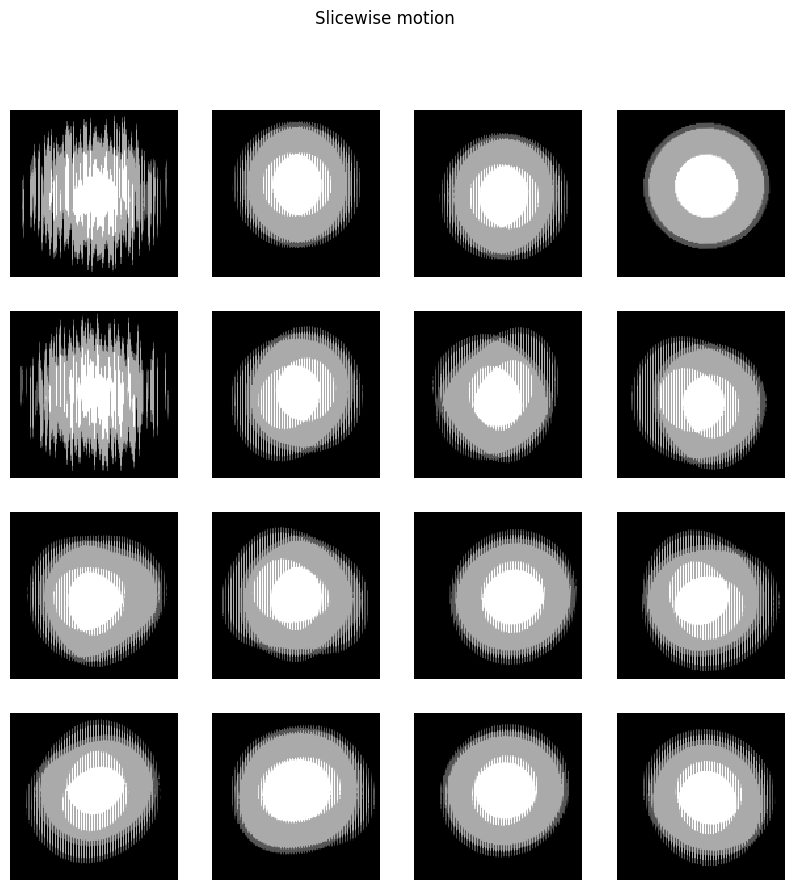

In [7]:
trf = RandomThroughSliceAffineTransform()

shape = [4, 4]
plt.rcParams["figure.figsize"] = (15, 15)

plt.figure(figsize=(10, 10))
for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(mag[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.suptitle('Slicewise motion')
plt.show()